In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv('titanic_train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


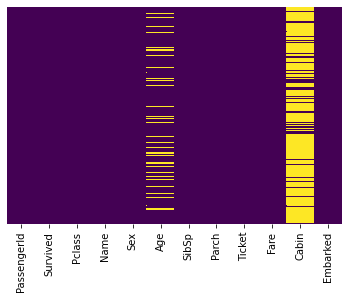

In [8]:
sns.heatmap(train.isnull(), yticklabels=False,cbar=False,cmap='viridis')

In [9]:
sns.set_style('whitegrid')

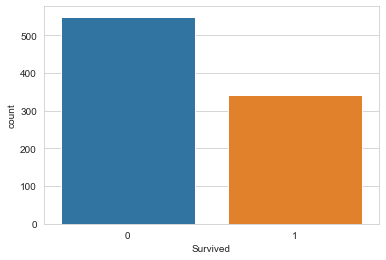

In [10]:
sns.countplot(x='Survived', data=train)

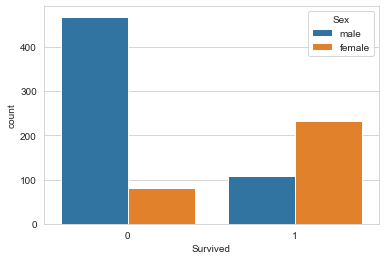

In [11]:
sns.countplot(x='Survived',hue='Sex',data=train)

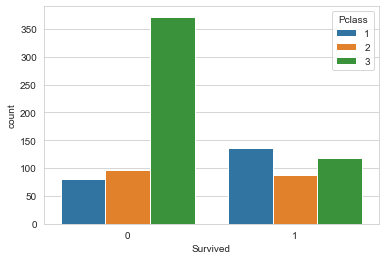

In [12]:
sns.countplot(x='Survived',hue='Pclass',data=train)

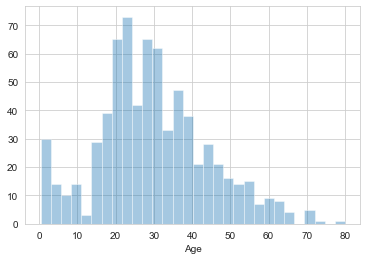

In [14]:
sns.distplot(train['Age'].dropna(), kde=False, bins=30)

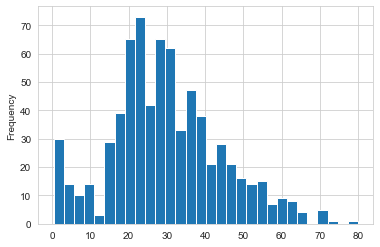

In [15]:
train['Age'].plot.hist(bins=30)

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


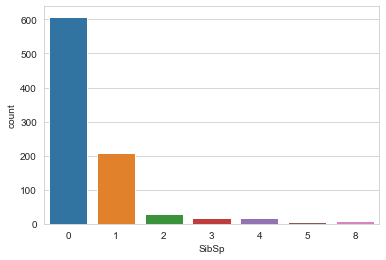

In [18]:
sns.countplot(x='SibSp',data=train)

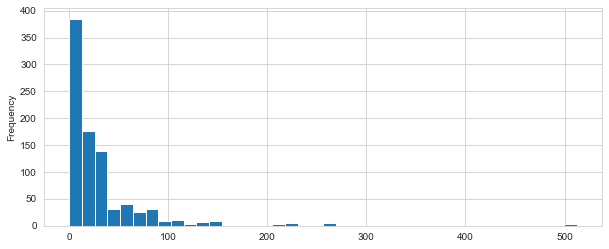

In [20]:
train['Fare'].plot.hist(bins=40, figsize=(10,4))

In [21]:
import cufflinks as cf

In [22]:
cf.go_offline()

In [23]:
train['Fare'].iplot(kind='hist', bins=30)

Cleaning the data

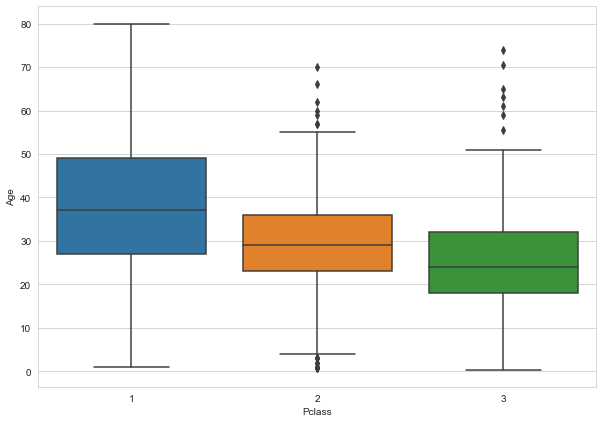

In [31]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age', data=train)

In [32]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [33]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age,axis=1) 

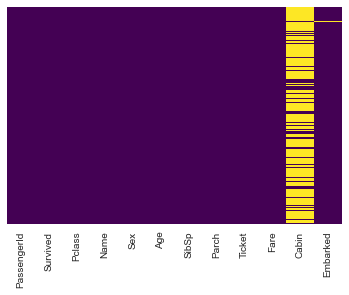

In [35]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [37]:
train.drop('Cabin', axis=1, inplace=True)

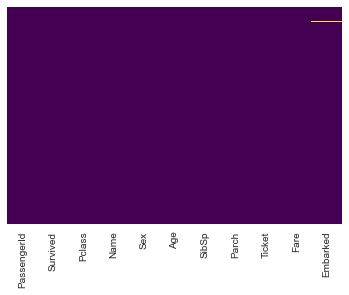

In [38]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [39]:
train.dropna(inplace=True)

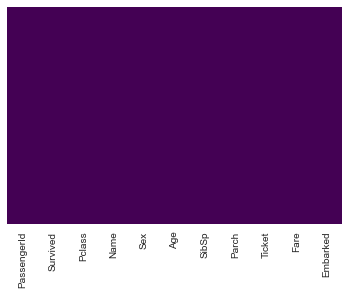

In [40]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [43]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [44]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [45]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [46]:
train = pd.concat([train,sex,embark], axis=1)

In [47]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [49]:
train.drop(['Sex','Embarked','Name','Ticket'], axis=1, inplace=True)

In [51]:
train.drop('PassenderId', axis=1, inplace=True)

KeyError: "['PassenderId'] not found in axis"